# Model training

On this notebook we will train a Linear regressor with two differents training models:

* Utilizing a equation to minimize the cost function;

* Utilizing a DG to minimize the cost function;

After this, we will do a polynomial regressor, this model has more parameters than Linear Regression it is more prone to overfitting the training data, so we will see how to detect whether this happens or not, using learning curves, and then we will cover regularization techniques that can reduce the risk of overfitting in the ensemble.
juste in the ensemble.

In the end of notebook we will study the Logistic and Softmax regressors.

## Linear Regression Model

Usally, a linear model do a prevision calculating a input attributes pondered sum, plus a constant called *polarization term*.

$\hat{y}$ = $\theta_{0}$ + $\theta_{1}x_{1}$ + $\theta_{2}x_{2}$ + ... + $\theta_{n}x_{n}$

* $\hat{y}$ is the expected value;

* n is the number of features;

* $x_{i}$ is the value of i-th feature;

* $\theta_{j}$ is the parammeter of j model;

Translating this equation for a vetorial form:

$\hat{y}$ = h$_{0}$($\textbf{x}$) = $\theta^{T} \cdot \textbf{x}$.

We can call h$_{0}$($\textbf{x}$) for *hypotesis function of x*.

For training our model we first need a good measurement to how well the model will fit the training data, for this, we can use MSE or RMSE, no difference for this application because if we minimize a function, we also minimize its root (and vice versa).

MSE($\textbf{X}, h_{\theta}$) = $\frac{1}{m}$ $\sum_{i = 1} ^{m} (\theta^{T} \textbf{x}^{(i)} - y^{(i)})^2$.

Obs.: to simplificate I will write MSE($\theta$) instead MSE($\textbf{X}, h_{\theta}$).

### Least Square method

To find the value of θ that minimizes the cost function, there exists a closed-form solution in other words, a mathematical equation that gives the result directly. This is called the Least Squares Method. 

$\hat{\theta} = (\textbf{X}^{T} \cdot \textbf{X})^{-1} \cdot \textbf{X}^{T} \cdot \textbf{y}$

let visualize this with a experiment:

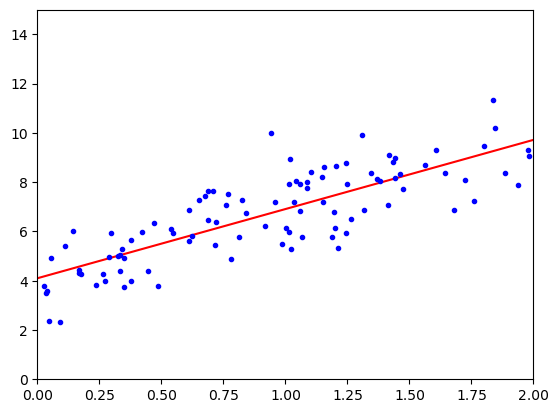

[[4.10126208]
 [2.80768795]]


In [2]:
# Using Numpy:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

# utilizing the LSM to minimizate the theta

X_b = np.c_[np.ones((100,1)), X] # ading X0 = 1 to wich instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # adiciona x0 = 1 a cada instância
y_predict = X_new_b.dot(theta_best)

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])

plt.show()
print(theta_best)

On the positive side, this equation is linear with respect to the number of instances
in the training set (it is O(m)), so it handles large training sets efficiently, as long as they can fit in memory.
training sets, as long as they can fit in memory.
Furthermore, when training your Linear Regression model (using the Least Squares
method or any other algorithm), your predictions become very fast: the computational
computational complexity is linear with respect to the number of instances where you
you want to predict and the number of features. In other words, making
twice as many instances (or twice as many features) will take approximately twice as long.
twice as long.


### Descending Gradient

*Gradient Descent* is a very generic optimization algorithm capable of finding optimal optimal solutions to a wide range of problems. The general idea of Gradient Descent is to iteratively adjust the parameters to minimize a cost function.

Concretely, you start by filling θ with random values (this is called random initialization), and then gradually improve it, taking one small step at a time, each step trying to decrease the cost function (e.g., the MSE), until the algorithm *converges* to a minimum.

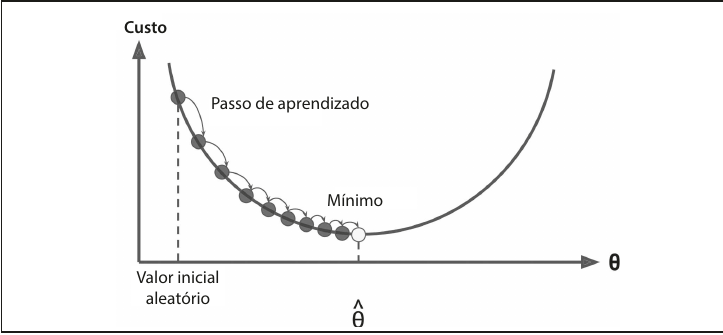

Step size is an important parameter of the Gradient Descent, determined by the *learning rate* hyperparameter. If the learning rate is too small, the algorithm will have to go through many iterations to converge, on the other hand, if the learning rate is too high, you can cross the valley and end up on the other side, possibly even higher than before. This can make the algorithm divergent with higher and higher values, not finding a good solution.

Here two graphs, the first one shows a DG with a to low learning rate, and the second one shows a DG with a to big learning rate:

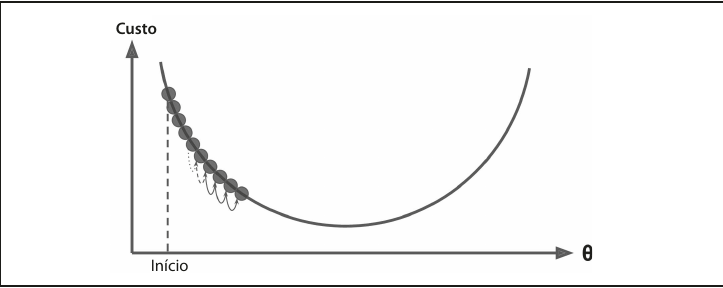

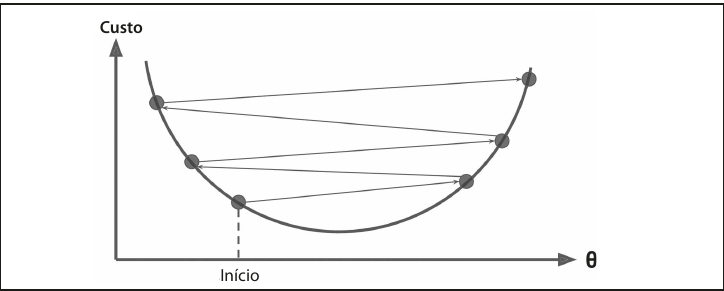

Using Descendent Gradient we have 2 big challenges:

* Our gradient can find a local minimium of the function and ignore a global minimum;

* Our gradient can find a plateau and the evolution of gradient is significatly slowed by this estabilization;

 The MSE cost function for a Linear Regression model is a convex function, which means that if you pick any two points on the curve, the line segment joining them never crosses it. This implies that there are no local minima, only a global minimum. It is also a continuous function with a slope that never changes abruptly. 4 These two facts generate a very good consequence: the Gradient Descent is guaranteed to arbitrarily approach the global minimum global minimum (if you wait long enough and if the learning rate is not too high).
 
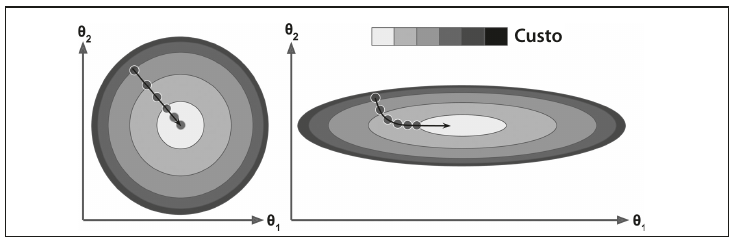

This diagram also illustrates the fact that training a model means searching for a combination of model parameters that minimizes a cost function (with respect to the training set). It is a search in the parameter space of the model: the more parameters a model has, the more dimensions this space has, and the more difficult the search will be: looking for a needle in a 300-dimensional haystack is much more complicated than in three dimensions. Fortunately, as in the case of Linear Regression the cost function is convex, the needle is simply at the bottom of the bowl.

### Batch Gradient Descending


To implement the descending gradient we first need to calculate the gradient of the cost function adopted for training the model.

$\frac{\partial }{\partial \theta_{j}} MSE(\theta)$ = $\frac{2}{m} \sum_{i = 1}^{m} (\theta^{T} \cdot \mathbf{x}^{(i)} - y^{(i)})x_{j}^{(i)}$

We can write this equation using another notation:

$\nabla_{\theta}MSE(\theta)$ = $ \begin{bmatrix}
    \frac{\partial }{\partial \theta_{0}} MSE(\theta)\\
    \frac{\partial }{\partial \theta_{1}} MSE(\theta) \\
    \vdots \\
    \frac{\partial }{\partial \theta_{n}} MSE(\theta)
\end{bmatrix} $ = $\frac{2}{m}\mathbf{X}^{T} \cdot (\mathbf{X} \cdot \theta - \mathbf{y})$


Applying this equation to the system, we fall into a numerical methods problem to determine the solution of the following polynomial:

$\theta^{(i+1)}$ = $\theta_{(i)} - \eta \nabla_{\theta_{i}}MSE(\theta_{(i)})$

Where $\theta_{(i)}$ is the actual value of $\theta$ and $\eta$ is the learning rate.

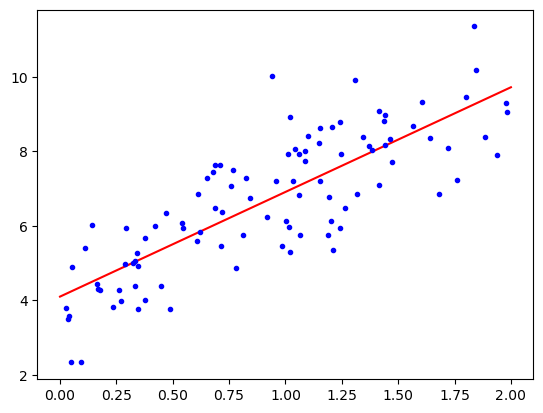

In [4]:
eta = 0.1
loop = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

# Applying the descendent gradient method:
for i in range(loop):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
y_predict = X_new_b.dot(theta)

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.show()

Through what was found using decending gradients it was possible to regress a straight line very close (if not identical) to the model using least squares. 
Above all, it is important to emphasize the importance of a good learning rate:

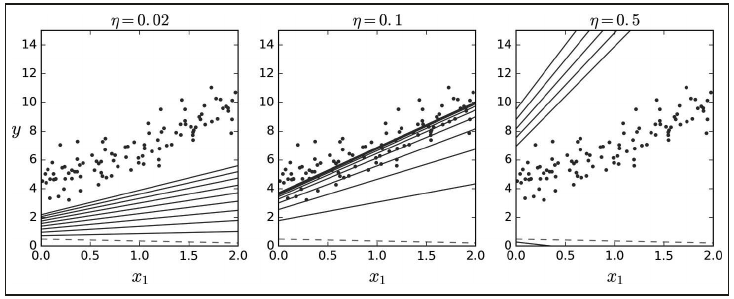

The learning rate on the left is too low: the algorithm will eventually reach the
solution, but it will take a long time. In the middle, the learning rate looks very good: with
only a few iterations it has already converged to the solution. On the right, the learning rate
rate is too high: the algorithm diverges, jumping all over the place and in fact getting
further and further away from the solution.

A silly solution is simply apply the grid search and find the best learning rate, but this is to much computationally expesive.

>>When the cost function is convex and its slope does not change abruptly (as
MSE cost function), the Batch Gradient Descent with a fixed learning rate will
learning rate will converge to the optimal solution, but you may have to wait a bit
a while: it may take O(1/ε) iterations to reach the best within a range of ε
depending on the shape of the cost function. If you divide the tolerance by 10 to get
a more accurate solution, the algorithm will have to run about 10 times as long.



### Stochastic Descending Gradient (SDG)

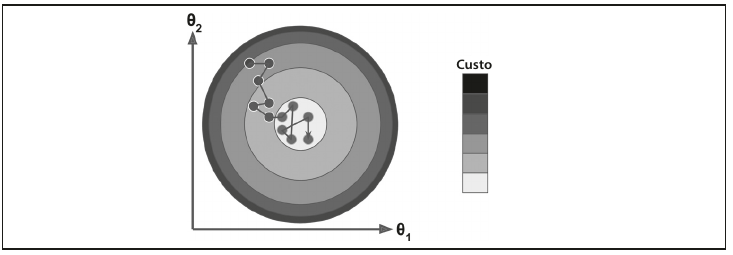

The main problem with the Batch Gradient Descent is the fact that it uses
the entire training set to compute gradients at each step, which makes it very slow when the
very slow when the set is large. At the opposite extreme, Stochastic Gradient Descent
Stochastically Descending Gradient (SGD) chooses a random instance from the training set at each
step and computes gradients based on just this single instance. Obviously, this
makes the algorithm much faster, since it has little data to manipulate in each iteration.
iteration. It also allows you to train on large training sets, since
only one instance needs to be in memory at each iteration.

On the other hand, due to its stochastic (i.e., random) nature, this algorithm is
much less regular than the Batch Gradient Descending: instead of decreasing continuously until
instead of decreasing continuously until it reaches the minimum, the cost function will go up and down, decreasing only
average. Over time, it will end up very close to the minimum, but when it gets there,
it will continue to bounce, never stabilizing.so when the
algorithm stops, the final parameter values will be good, but not optimal.

>> When the cost function is very irregular, this can actually
help the algorithm jump outside the local minimum, so that the Stochastic Descending Gradient
Stochastic Gradient Descending will have a better chance of finding the global minimum than the Batch Gradient
Batch Descending Gradient.

In this way, randomness is good for escaping the local optimum, but bad because it means
the algorithm can never settle on the minimum. One solution to this dilemma is to
to gradually reduce the learning rate. The steps start out large (which helps to
make rapid progress and escape local minima) and then slow down, allowing the
the algorithm to settle on the global minimum. This process is called simulated
because it resembles the annealing process in metallurgy in that the molten metal is cooled slowly.
is cooled slowly. The function that determines the learning rate at each
iteration is called the *learning schedule*. If the learning rate is reduced
you can get stuck at a local minimum, or even end up frozen halfway to the minimum.
halfway to the minimum. If the learning rate is reduced slowly, you can
bounce around the minimum for a long period of time and end up with an insufficient solution if you
insufficient if you stop training too soon.

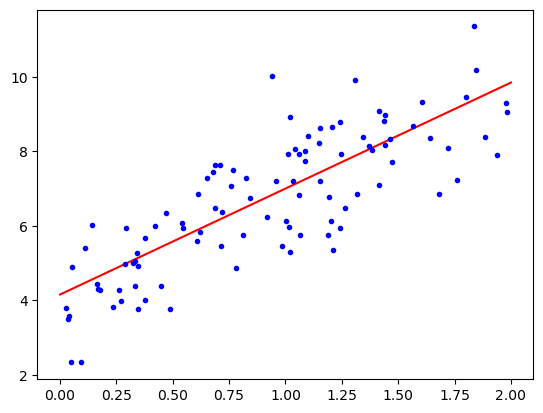

In [6]:
epochs = 50
t0, t1 = 5, 50 # hiperparametters of learning

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random  initialization

for i in range(epochs):
    for j in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(i*m + j)
        
        theta = theta - eta * gradients
        
y_predict = X_new_b.dot(theta)

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.show()

Now, the same experiment, but using Scikit-learn:

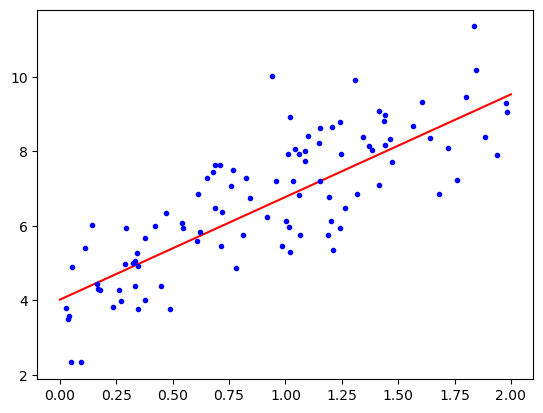

In [14]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1, tol=1e-05)

sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

theta = [sgd_reg.intercept_, sgd_reg.coef_]

y_predict = X_new_b.dot(theta)

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.show()

### Mini-batchs Gradient Descent